In [1]:
import warnings
warnings.simplefilter('ignore')

import pickle

# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import matplotlib.pyplot as plt

# Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Read in data
train_df = pd.read_csv('../Resources/us-company-ml.csv')


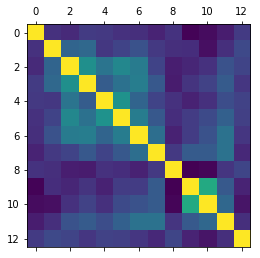

In [3]:
# Create the correlation matrix
plt.matshow(train_df.corr())

In [4]:
# Prep training data
train_df = train_df.drop(train_df.columns[0], axis=1).copy()
data = train_df.drop("treatment", axis=1)
target = train_df["treatment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_train

,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
558,2,2,2,1,0,0,2,0,0,1,0
503,1,2,1,1,2,0,1,1,2,2,0
690,0,0,0,0,0,4,1,2,2,0,0
332,2,1,2,0,2,0,1,1,2,2,0
731,2,0,1,1,0,2,2,1,0,1,1
110,0,0,1,0,0,0,0,1,2,2,0
82,2,0,1,1,2,0,0,0,0,0,0
51,2,2,2,2,2,4,0,1,2,2,0
513,0,1,2,0,0,0,0,1,0,0,0
603,2,1,2,2,2,2,1,0,0,0,0


In [5]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train)
acc_log

0.6518650088809946

In [6]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# serializing our model to a file called svm_model.pkl
pickle.dump(svc, open("../App_Files/Models/svm_model.pkl","wb"))

acc_svc = svc.score(X_train, y_train)
acc_svc

0.7033747779751333

In [7]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
acc_knn

0.7673179396092362

In [8]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# serializing our model to a file called svm_model.pkl
pickle.dump(decision_tree, open("../App_Files/Models/dtree_model.pkl","wb"))

y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train)
acc_decision_tree

0.9538188277087034

In [9]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, y_train)
acc_random_forest

0.9538188277087034